TypeError: 'module' object is not iterable

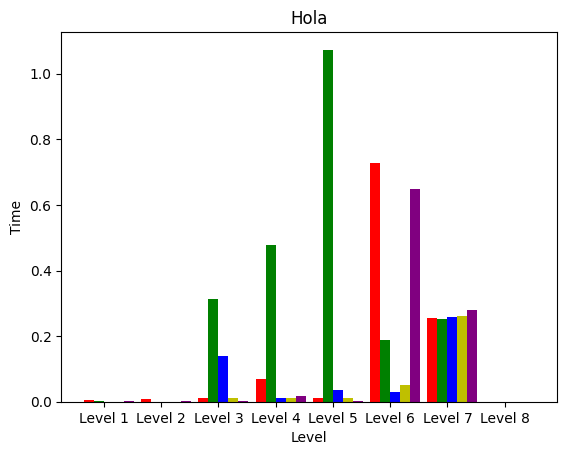

In [4]:
from TP1.utils.process_map import process_map, read_file
from TP1.utils.graph_utils import barGraphGroupedPercent
from TP1.utils.heuristics import manhattan_heuristic
from TP1.utils.algorithms_utils import generate_children_sokoban
from TP1.utils.algorithms import bfs, dfs, global_greedy, local_greedy, astar
import time

uninformed_methods = [bfs, dfs]
informed_methods = [local_greedy, global_greedy, astar]
data_time = []
cost = []
border_nodes = []
expanded_nodes=[]
for i in range(1, 9):
    level_time = []
    level_cost = []
    level_borders = []
    level_expanded = []
    state,start =process_map(read_file("./Levels/level" + str(i) + ".txt"))

    for method in uninformed_methods:
        start_time = time.time()
        response = method(state, start, generate_children_sokoban)
        level_time.append(time.time() - start_time)
        level_cost.append(response["cost"])
        level_borders.append(response["border"])
        level_expanded.append(response["expanded_nodes"])
    for method in informed_methods:
        start_time = time.time()
        response = method(state, start, generate_children_sokoban, manhattan_heuristic)
        level_time.append(time.time() - start_time)
        level_cost.append(response["cost"])
        level_borders.append(response["border"])
        level_expanded.append(response["expanded_nodes"])
    data_time.append(level_time)
    cost.append(level_cost)
    border_nodes.append(level_borders)
    expanded_nodes.append(level_expanded)

groupLabels = ["Level " + str(i) for i in range(1, 9)]
barLabels = ["BFS", "DFS", "Local Greedy", "Global Greedy", "A*"]
xLabel = "Level"
colors = ['r', 'g', 'b', 'y', 'purple']

#Time graph
barGraphGroupedPercent(data_time, 0, 2, groupLabels, barLabels, colors, xLabel, "Time", "Hola")
